In [2]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path='../XAS_Extraction/labeled'
for roots,dirs,files in os.walk(path):
    for file in files:
        if file.startswith('.DS_Store'):
            # os.remove(os.path.join(roots,file))
            print(roots,file)
    if roots.endswith('XANES') or roots.endswith('EXAFS'):
        if os.listdir(roots)==[]:
            print(roots,files)
            # shutil.rmtree(roots)
for file in os.listdir('../XAS_Extraction/labeled'):
    _files=os.listdir(os.path.join('../XAS_Extraction/labeled',file))
    if 'XANES' not in _files and 'EXAFS' not in _files:
        print(f"XANES/EXAFS not extractable in {file}")
        # shutil.rmtree(os.path.join('../XAS_Extraction/labeled',file))

Text(0.5, 1.0, 'XANES: 364, EXAFS: 112')

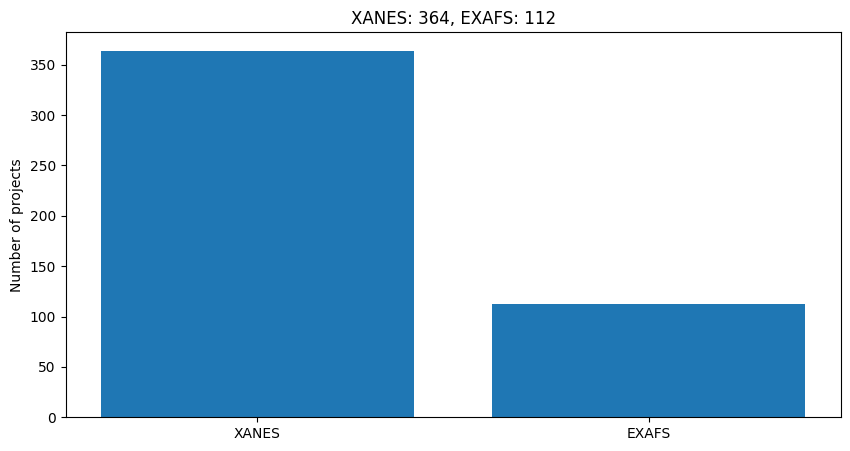

In [3]:
data_folder='../XAS_Extraction/labeled'
EXAFS_num=0
XANES_num=0
for proj in os.listdir(data_folder):
    if proj.endswith('.DS_Store'):
        os.remove(os.path.join(data_folder,proj))
    if 'XANES' in os.listdir(os.path.join(data_folder,proj)):
        XANES_num+=1
    if 'EXAFS' in os.listdir(os.path.join(data_folder,proj)):
        EXAFS_num+=1
plt.figure(figsize=(10,5))
plt.bar(['XANES','EXAFS'],[XANES_num,EXAFS_num])
plt.ylabel('Number of projects')
plt.title(f"XANES: {XANES_num}, EXAFS: {EXAFS_num}")
# plt.savefig('XANES_EXAFS.png')

## Clean up dataset

### Sort All CSV files according to energy columns

In [5]:
cleaned_path='../XAS_Extraction/cleaned'
for roots,dirs,files in os.walk(cleaned_path):
    for file in files:
        if file.endswith('.DS_Store'):
            os.remove(os.path.join(roots,file))
        # Sort the xy data by energy column
        if file.endswith('.csv'):
            data=pd.read_csv(os.path.join(roots,file),header=None)
            data=data.sort_values(by=0)
            data.to_csv(os.path.join(roots,file),index=False)